Data Project - Stock Market Analysis
Use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?
Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data, wb, DataReader

# For time stamps
from datetime import datetime




Functions from pandas.io.data and pandas.io.ga extract data from various Internet sources into a DataFrame. Currently the following sources are supported:

Yahoo! Finance
Google Finance
St.Louis FED (FRED)
Kenneth French’s data library
World Bank
Google Analytics

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    # storing in global to access the stock data outside the for loop
    

In [5]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,160.283730,156.394325,158.236984,158.433770,8.836726e+07,157.985985
std,12.578102,12.470495,12.607039,12.500946,2.641185e+07,12.454506
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,129.879593
25%,149.694996,146.694996,148.302494,148.677502,6.982765e+07,147.913658
50%,161.970001,156.625000,159.580002,159.260002,8.264010e+07,158.877831
75%,171.057503,167.220001,169.232502,168.970005,9.950228e+07,168.630119
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.259933


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-09-20 to 2022-09-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [7]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-20,144.839996,141.270004,143.800003,142.940002,123478900.0,142.143494
2021-09-21,144.600006,142.779999,143.929993,143.429993,75834000.0,142.630753
2021-09-22,146.429993,143.699997,144.449997,145.850006,76404300.0,145.037262
2021-09-23,147.080002,145.639999,146.649994,146.830002,64838200.0,146.011826
2021-09-24,147.470001,145.559998,145.660004,146.919998,53477900.0,146.101303


<AxesSubplot:xlabel='Date'>

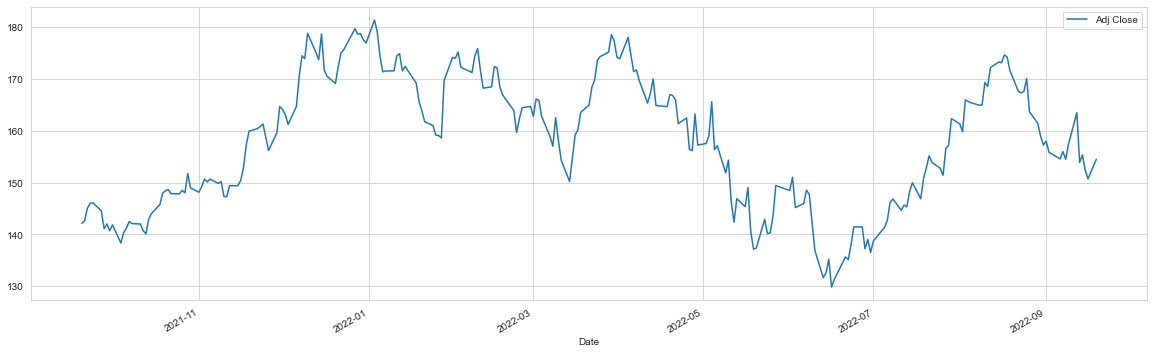

In [15]:
AAPL['Adj Close'].plot(legend = True,figsize = (20,6))

<AxesSubplot:xlabel='Date'>

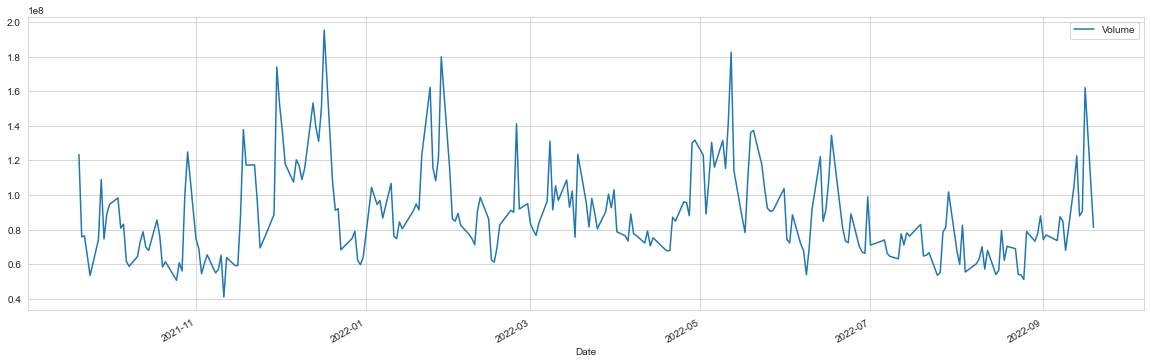

In [16]:
AAPL['Volume'].plot(legend = True,figsize =(20,6))

In [19]:
ma = [10,20,50]

for days in ma:
    column = f"Ma for {days} days"
#     pd.Series(timeseries).rolling(window=24).mean()
    AAPL[column] = AAPL['Adj Close'].rolling(window=days).mean()

<AxesSubplot:xlabel='Date'>

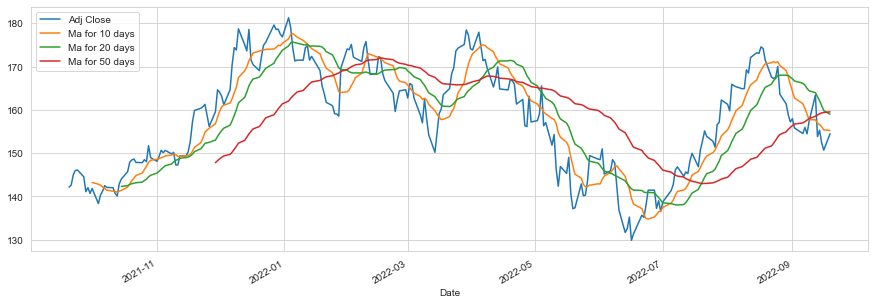

In [24]:
AAPL[['Adj Close','Ma for 10 days','Ma for 20 days','Ma for 50 days']].plot(legend=True,figsize = (15,5))

In [25]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

<AxesSubplot:xlabel='Date'>

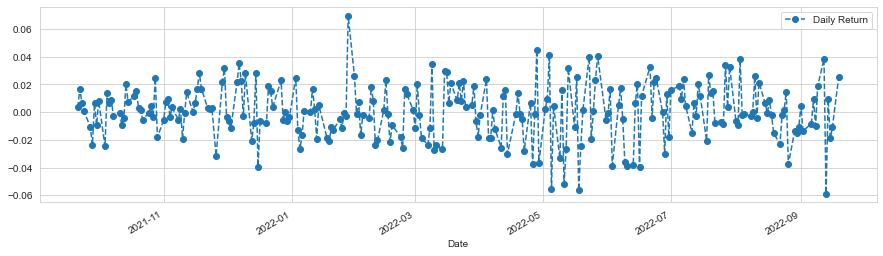

In [28]:
AAPL['Daily Return'].plot(legend = True, figsize =(15,4),linestyle ='--',marker ='o')

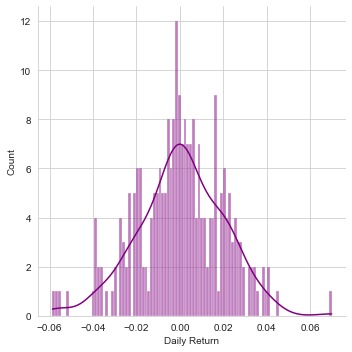

In [34]:
sns.displot(AAPL['Daily Return'].dropna(),bins =100, color = 'purple',kde = True)

In [35]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [36]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-09-20,142.143494,139.016998,291.855682,167.786499
2021-09-21,142.630737,139.646500,292.351562,167.181503
2021-09-22,145.037277,140.938507,296.100128,169.002502
2021-09-23,146.011841,141.826508,297.071960,170.800003
2021-09-24,146.101318,142.632996,296.863739,171.276001
